## 0 .Import Packages

In [4]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Mean

In [3]:
with tf.Session() as sess:
    test = sess.run(tf.random_normal([10]))
    mean = sess.run(tf.reduce_mean(test))
    print(test)
    print("mean: ", mean)

[ 0.69333225  0.3389564   0.31915516  0.08547423 -0.56402713  0.63547504
 -0.64382505  0.17470863  0.6537082  -0.36861426]
mean:  0.13243434


## 2. Training with MLP

Step : 0, cost : 0.7009455  acc : 0.5
Step : 1000, cost : 0.6928068  acc : 0.5
Step : 2000, cost : 0.6913495  acc : 0.5
Step : 3000, cost : 0.6884863  acc : 0.75
Step : 4000, cost : 0.68211055  acc : 0.75
Step : 5000, cost : 0.6663864  acc : 0.75
Step : 6000, cost : 0.6300764  acc : 0.75
Step : 7000, cost : 0.5827523  acc : 0.75
Step : 8000, cost : 0.5474477  acc : 0.75
Step : 9000, cost : 0.52232325  acc : 0.75


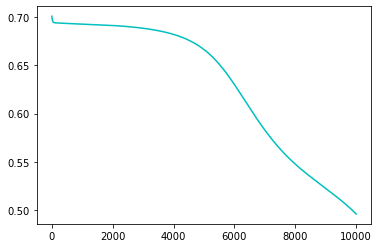

In [5]:
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0], [1], [1], [0]]

with tf.Session() as sess:
    a = 0.05 # learning rate
    x = tf.placeholder(tf.float32, shape=[None,2])
    y = tf.placeholder(tf.float32, shape=[None,1])

    W1 = tf.Variable(tf.random_normal([2,2]), dtype=tf.float32)
    b1 = tf.Variable(tf.random_normal([2]), dtype=tf.float32)

    H1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)

    W2 = tf.Variable(tf.random_normal([2,1]), dtype=tf.float32)
    b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

    H = tf.sigmoid(tf.matmul(H1,W2)+b2)

    cost = - tf.reduce_mean(y * tf.log(H) + (1 - y) * tf.log(1 - H))
    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 

  # Calculate accuracy
  # If Hypothesis H가 > 0.5 then 1 else 0
    predicted = tf.cast(H > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    cost_list = []

    iteration = 10000
    for step in range(iteration):
        acc, c, _, = sess.run([accuracy, cost,  train], feed_dict={x: x_data, y: y_data})
        cost_list.append(c)
        if step % (iteration//10) == 0:  # 전체 학습 중 10번만 비용함수/정확도 표시
            print("Step : %i, cost : %s  acc : %s" %(step, c, acc)) 

    plt.plot(cost_list, "c")
    W3, b3, W4, b4 = sess.run([W1, b1, W2, b2],  feed_dict={x: x_data, y: y_data})

- Accuracy : 1

In [7]:
print(W3)
print('')
print(b3)
print('')
print(W4)
print('')
print(b4)

[[-0.86219555  4.7909036 ]
 [-0.61108917  4.7776623 ]]

[ 0.04994126 -1.0567884 ]

[[1.0983615]
 [4.134138 ]]

[-3.7885597]


## 3. Check the line

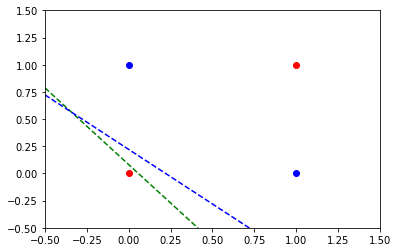

In [8]:
plt.axis([-0.5, 1.5, -0.5, 1.5])

for i, j in enumerate(y_data):
    if j == [0] : 
          plt.plot(x_data[i][0], x_data[i][1], "ro")
    else :
          plt.plot(x_data[i][0], x_data[i][1], "bo")

x1 = np.linspace(-0.5,1.5, 30)
plt.plot(x1,-W3[0][0]/W3[1][0]*x1-b3[0]/W3[1][0], "g--") 
plt.plot(x1,-W3[0][1]/W3[1][1]*x1-b3[1]/W3[1][1], "b--") 
plt.show()

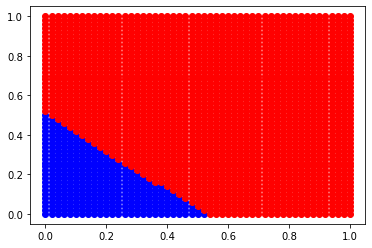

In [9]:
# t_X : test data
# x : 0~1
# y : 0~1
t_X = []
for i in range(51):
    for j in range(51):
        t_X.append([(float(i))/50, (float(j))/50])
        
h = sess.run(H, feed_dict={x: t_X})
for t in range(len(t_X)):
    _x = np.array(t_X[t])
    if h[t] > 0.5:
        plt.plot(_x[0],_x[1],'ro')
    else:
        plt.plot(_x[0],_x[1],'bo')
plt.show()

- Final results

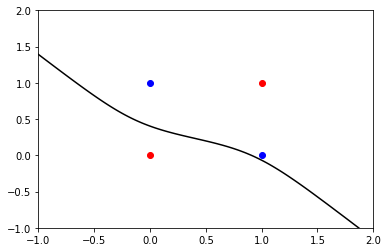

In [10]:
\def sigmoid(x):
    return 1. / (1. + np.exp(-x))

delta = 0.025
x = np.arange(-6, 3, delta)
y = np.arange(-6, 3, delta)
p, q = np.meshgrid(x, y)
# define some function f(n,x,y)
f = lambda n, x, y: sigmoid(x*W3[0][0]+y*W3[1][0]+b3[0])*W4[0][0]+sigmoid(x*W3[0][1]+y*W3[1][1]+b3[1])*W4[1][0]+b4[0]
z=f(1, p,q)

# plot contour line of f(1,x,y)==0
plt.contour(p, q, z , [0], colors=["k"])

for i, j in enumerate(y_data):
    if j == [0] : 
          plt.plot(x_data[i][0], x_data[i][1], "ro")
    else :
          plt.plot(x_data[i][0], x_data[i][1], "bo")
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.show()  